# Final Project - Explorative Analysis of Environmental Justice Screening Data & Arizona Census Tracts

This project is meant to analyze correlations between prevalence/location of indigenous communities in Arizona and environmental justice screening variables such as proximity to EPA Superfund sites, cancer risk, and more. There are 2 parts to this project:

### 1. Exploratory analysis using Jupyter Notebook
This includes testing for correlation between chosen variables and a Moran's I analysis. 

### 2. Produce an interactive web page showcasing the census tracts' information
This map will be created using MapBox and will be hosted on my github.

## Code (Part 1 - Exploratory Analysis Using Jupyter Notebook)

### a. Mapping

1. Prepare the necessary Python modules. To follow our class's lab, I am using seaborn.

In [2]:
import seaborn
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

2. Prepare the data. This is a very large file (originally a .csv file that I converted into a .shp) and contains information on environmental screening data for the state of Arizona.

In [80]:
EJscreen_gdf = gpd.read_file('AZ_EJ_cbg_WGS_new.shp')
EJscreen_gdf.head(15)

,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,ALAND,AWATER,GEOID_sh,OBJECTID,ID,ACSTOTPOP,...,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Leng,GEOID_1,Shape_Le_1,Shape_Area,geometry
0,523002,3,040135230023,Block Group 3,666349.0,0.0,40135230023,6320,4.013523e+10,1595,...,0.318495,0.230174,0.269603,0.028213,0.155486,3913.125259,40135230023,3264.888508,6.659205e+05,"POLYGON ((-111.85911 33.30738, -111.85909 33.3..."
1,523102,3,040135231023,Block Group 3,953890.0,0.0,40135231023,6335,4.013523e+10,1354,...,0.187592,0.029954,0.075515,0.110044,0.043575,4766.378437,40135231023,3979.114698,9.532677e+05,"POLYGON ((-111.83703 33.29891, -111.83657 33.2..."
2,002504,2,040190025042,Block Group 2,379597.0,0.0,40190025042,7144,4.019003e+10,503,...,0.409543,0.000000,0.142259,0.000000,0.015905,3393.885524,40190025042,2868.057269,3.792937e+05,"POLYGON ((-111.00490 32.16971, -111.00485 32.1..."
3,002505,1,040190025051,Block Group 1,412197.0,0.0,40190025051,7146,4.019003e+10,1700,...,0.694706,0.079848,0.197421,0.056471,0.078235,3166.503362,40190025051,2675.881089,4.118686e+05,"POLYGON ((-111.00669 32.14948, -111.00666 32.1..."
4,002506,1,040190025061,Block Group 1,595584.0,0.0,40190025061,7149,4.019003e+10,2047,...,0.507084,0.147009,0.237958,0.040547,0.085979,4126.251179,40190025061,3483.917076,5.951081e+05,"POLYGON ((-111.01168 32.14061, -111.01164 32.1..."
5,002604,1,040190026041,Block Group 1,712077.0,0.0,40190026041,7159,4.019003e+10,2206,...,0.780878,0.142202,0.262635,0.079782,0.054397,6172.824061,40190026041,5218.202988,7.115087e+05,"POLYGON ((-110.98667 32.27368, -110.97824 32.2..."
6,002602,1,040190026021,Block Group 1,555877.0,0.0,40190026021,7153,4.019003e+10,1010,...,0.550495,0.018215,0.075714,0.000000,0.062376,3851.230046,40190026021,3250.204649,5.554347e+05,"POLYGON ((-110.96109 32.27936, -110.95841 32.2..."
7,002602,2,040190026022,Block Group 2,555837.0,0.0,40190026022,7154,4.019003e+10,1678,...,0.635379,0.045087,0.179984,0.010131,0.230632,5896.346638,40190026022,4969.228587,5.553926e+05,"POLYGON ((-110.96351 32.27060, -110.96351 32.2..."
8,001100,2,040210011002,Block Group 2,1303864.0,0.0,40210011002,7755,4.021001e+10,2096,...,0.684337,0.037175,0.231916,0.046279,0.144084,5773.222047,40210011002,4838.458771,1.302901e+06,"POLYGON ((-111.54128 32.98053, -111.54110 32.9..."
9,941200,3,040219412003,Block Group 3,162830557.0,0.0,40219412003,7853,4.021941e+10,1971,...,0.814380,0.000000,0.388571,0.084729,0.076104,71880.482740,40219412003,60149.613431,1.627127e+08,"POLYGON ((-111.68709 33.09179, -111.68702 33.0..."


3. Create a quick choropleth map of just one variable - % minority - to get a sense of the demographic data.

In [4]:
# prepare the libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc

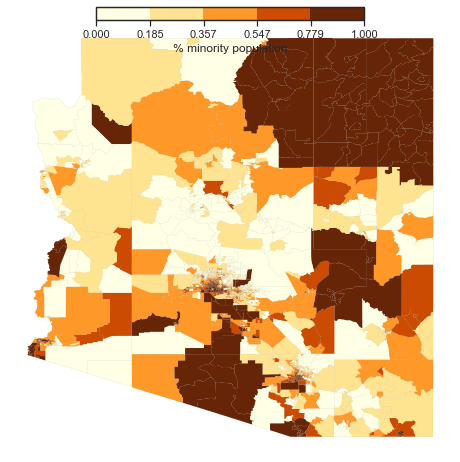

In [39]:
EJscreen_gdf_AZ = EJscreen_gdf.to_crs(epsg=4326)


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlOrBr', n_class)

# plot the state limit as the background
EJscreen_gdf_AZ.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'MINORPCT'

# plot the choropleth map of % minority in Arizona
EJscreen_gdf_AZ.plot(column=field, 
                     cmap='YlOrBr', 
                     edgecolor='0.01', 
                     ax = ax,
                     linewidth=0.01,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(EJscreen_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, EJscreen_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('% minority population')


ax.set_axis_off()
plt.axis('equal')
plt.show()

4. Create a quick choropleth map of the EJ index for Air toxins cancer risk.

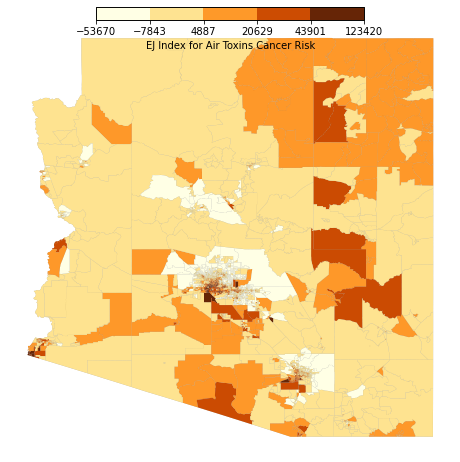

In [6]:
# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlOrBr', n_class)

# plot the state limit as the background
EJscreen_gdf_AZ.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'D_CANCR_2'

# plot the choropleth map of the EJ index for air toxins cancer risk in Arizona
EJscreen_gdf_AZ.plot(column=field, 
                     cmap='YlOrBr', 
                     edgecolor='0.01', 
                     ax = ax,
                     linewidth=0.01,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(EJscreen_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, EJscreen_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('EJ Index for Air Toxins Cancer Risk')


ax.set_axis_off()
plt.axis('equal')
plt.show()

5. Create a quick choropleth map of the proximity to National Priority List sites (Superfund sites).

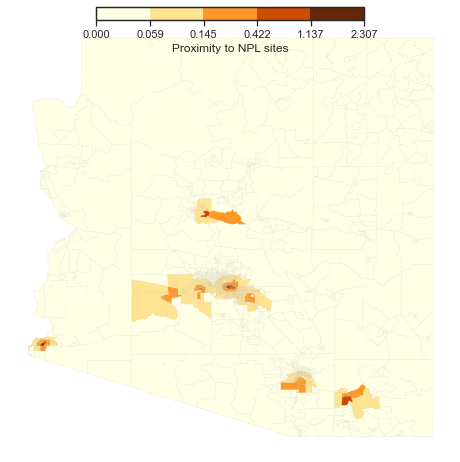

In [120]:
# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlOrBr', n_class)

# plot the state limit as the background
EJscreen_gdf_AZ.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'PNPL'

# plot the choropleth map of the proximity to National Priorities List (NPL) sites/Superfund sites
EJscreen_gdf_AZ.plot(column=field, 
                     cmap='YlOrBr', 
                     edgecolor='0.01', 
                     ax = ax,
                     linewidth=0.01,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(EJscreen_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, EJscreen_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Proximity to NPL sites')


ax.set_axis_off()
plt.axis('equal')
plt.show()

6. Create a choropleth map showing the EJ index for houses with lead paint.

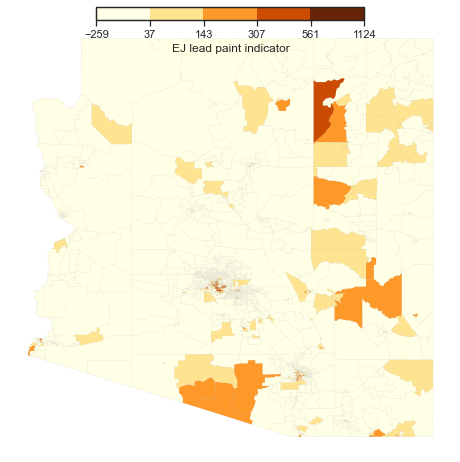

In [41]:
# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlOrBr', n_class)

# plot the state limit as the background
EJscreen_gdf_AZ.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'D_LDPNT_2'

# plot the choropleth map of the proximity to National Priorities List (NPL) sites/Superfund sites
EJscreen_gdf_AZ.plot(column=field, 
                     cmap='YlOrBr', 
                     edgecolor='0.01', 
                     ax = ax,
                     linewidth=0.01,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(EJscreen_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, EJscreen_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('EJ lead paint indicator')


ax.set_axis_off()
plt.axis('equal')
plt.show()

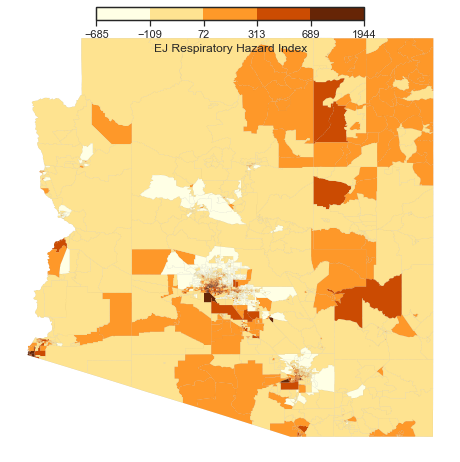

In [45]:
# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 5

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlOrBr', n_class)

# plot the state limit as the background
EJscreen_gdf_AZ.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'D_RESP_2'

# plot the choropleth map of the EJ index for air toxins cancer risk in Arizona
EJscreen_gdf_AZ.plot(column=field, 
                     cmap='YlOrBr', 
                     edgecolor='0.01', 
                     ax = ax,
                     linewidth=0.01,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(EJscreen_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, EJscreen_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('EJ Respiratory Hazard Index')


ax.set_axis_off()
plt.axis('equal')
plt.show()

### b. Boxplots, Scatterplots, & Histograms

#### 1. I first display a boxplot showing the relationship between % minority population ('MINORPCT') and proximity to National Priority List sites - the most prioritized of the Superfund sites ('PNPL').

In [25]:
import seaborn as sns

In [26]:
# prep data - drop any NAs in the data
EJscreen_gdf_valid = EJscreen_gdf.dropna(how='any',axis=0)

In [27]:
# prep data - slice two columns from `EJscreen_gdf_valid` and create a new dataframe
plot_df = EJscreen_gdf_valid[['MINORPCT', 'PNPL']]

Text(0.5, 1.0, 'Box map - % Minority & Proximity to NPL Sites')

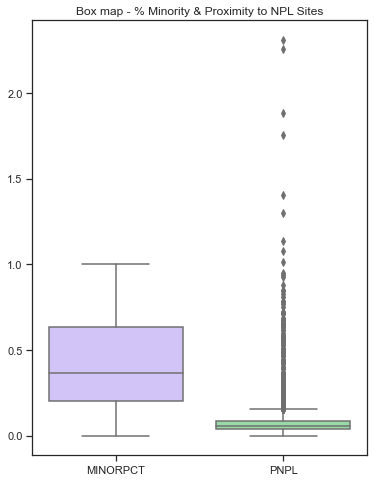

In [119]:
# BOXPLOT - set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df, palette=["m", "g"])
plt.title("Box map - % Minority & Proximity to NPL Sites")

##### I then display a scatterplot showing the relationship between the same two variables.

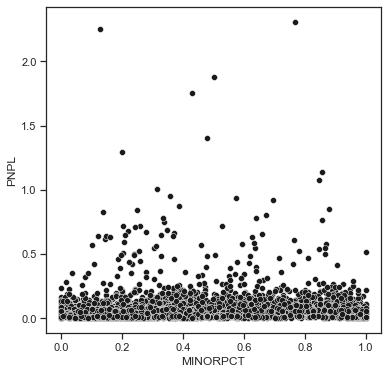

In [29]:
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(x="MINORPCT", y="PNPL", data=plot_df, color='k')

###### I then show a histogram and scatterplot together to better visualize the results.

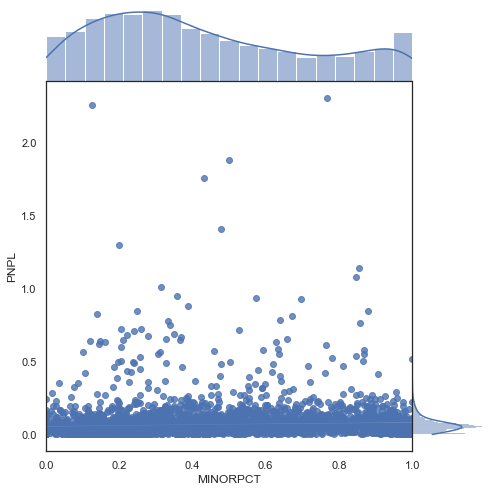

In [30]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x='MINORPCT', y='PNPL', data=plot_df, kind="reg", height=7, space=0)

When looking at the plots, there doesn't seem to be much of relationship - we cannot distinguish a positive or negative trend.

#### 2. I then look at the relationship between % minority population ('MINORPCT') and the EJ Index for Cancer Risk ('D_CANCR_2').

In [48]:
# create second data frame with these 2 variables
plot_df1 = EJscreen_gdf_valid[['MINORPCT', 'D_CANCR_2']]

Text(0.5, 1.0, 'Box Plot - % Minority & Cancer Risk Index')

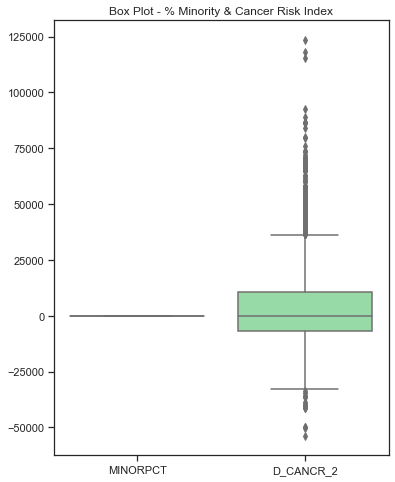

In [52]:
# BOXPLOT - set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df1, palette=["m", "g"])
plt.title("Box Plot - % Minority & Cancer Risk Index")

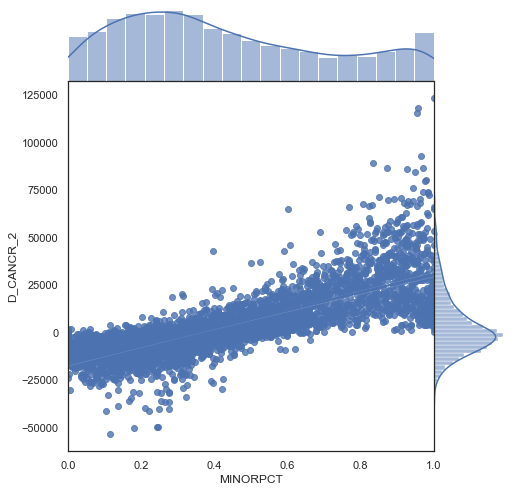

In [55]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x='MINORPCT', y='D_CANCR_2', data=plot_df1, kind="reg", height=7, space=0)

When looking at the plots, we can distinguish a fairly strong positive trend.

#### 3. I also want to look at the relationship between % minority population ('MINORPCT') and the EJ Index for Lead Paint Indicator ('D_LDPNT_2').

In [56]:
# create third data frame with these 2 variables
plot_df2 = EJscreen_gdf_valid[['MINORPCT', 'D_LDPNT_2']]

Text(0.5, 1.0, 'Box Plot - % Minority & Lead Paint Prevalence Indicator')

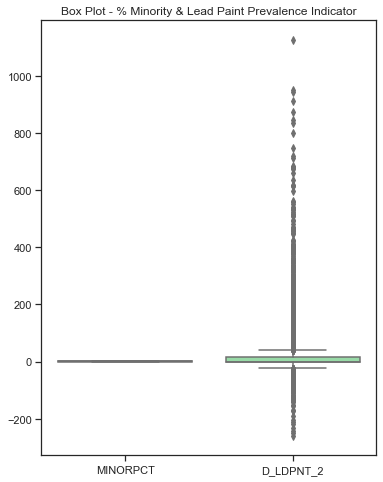

In [57]:
# BOXPLOT - set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df2, palette=["m", "g"])
plt.title("Box Plot - % Minority & Lead Paint Prevalence Indicator")

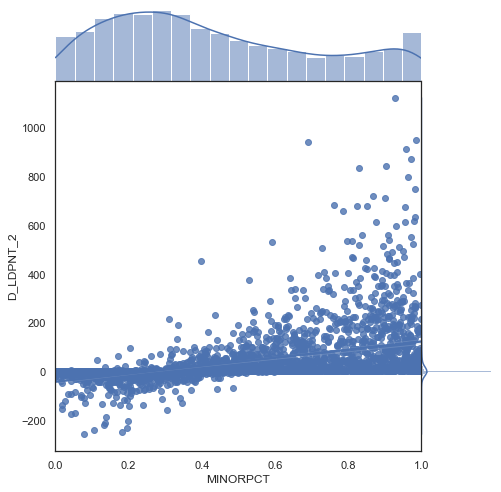

In [58]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x='MINORPCT', y='D_LDPNT_2', data=plot_df2, kind="reg", height=7, space=0)

When looking at the plots, we can distinguish a weak/moderate positive trend.

#### 4. Lastly, I'd like to look at the relationship between % minority population and the EJ index for respitatory hazard indicator ('D_RESP_2'). 

In [60]:
# create fourth data frame with these 2 variables
plot_df3 = EJscreen_gdf_valid[['MINORPCT', 'D_RESP_2']]

Text(0.5, 1.0, 'Box Plot - % Minority & EJ Index for Respiratory Hazard')

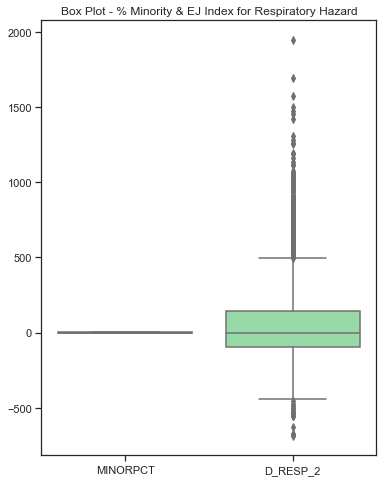

In [61]:
# BOXPLOT - set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df3, palette=["m", "g"])
plt.title("Box Plot - % Minority & EJ Index for Respiratory Hazard")

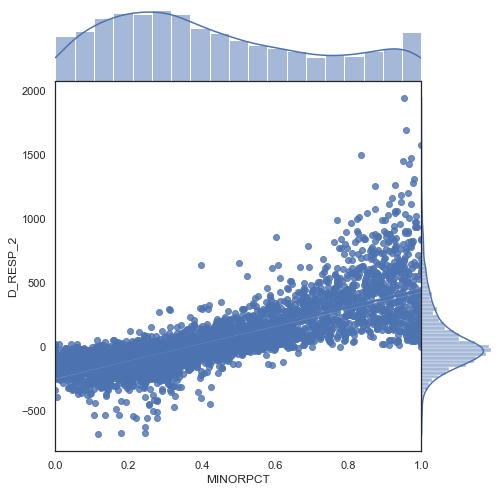

In [62]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x='MINORPCT', y='D_RESP_2', data=plot_df3, kind="reg", height=7, space=0)

When looking at the plots, we can distinguish a moderate/fairly strong positive trend.

### c. Measuring Correlation

#### 1. Now I measure correlation (pearson method) between % minority population and proximity to Superfund sites.

In [47]:
# pearson correlation for MINORPCT & PNPL
plot_df.corr(method = 'pearson')

,MINORPCT,PNPL
MINORPCT,1.000000,0.072296
PNPL,0.072296,1.000000


#### 2. Next I measure correlation between % minority population and the cancer risk index.

In [53]:
# pearson correlation for MINORPCT & D_CANCR_2
plot_df1.corr(method = 'pearson')

,MINORPCT,D_CANCR_2
MINORPCT,1.0000,0.7824
D_CANCR_2,0.7824,1.0000


#### 3. Next I measure correlation between % minority population and the lead paint prevalence indicator.

In [59]:
# pearson correlation for MINORPCT & D_LDPNT_2
plot_df2.corr(method = 'pearson')

,MINORPCT,D_LDPNT_2
MINORPCT,1.000000,0.499454
D_LDPNT_2,0.499454,1.000000


#### 4. Lastly, I measure correlation between % minority population and the respiratory hazard index.

In [63]:
# pearson correlation for MINORPCT & D_RESP_2
plot_df3.corr(method = 'pearson')

,MINORPCT,D_RESP_2
MINORPCT,1.000000,0.769333
D_RESP_2,0.769333,1.000000


### d. Spatial Autocorrelation

#### 1. I'd like to first look at the spatial autocorrelation of % minority population ('MINORPCT').

In [92]:
import libpysal as lps
from libpysal.weights import Queen
import libpysal

In [100]:
# fill the NA values (if any) with mean value of the column
EJscreen_gdf['MINORPCT'].fillna((EJscreen_gdf['MINORPCT'].mean()), inplace=True)

In [101]:
# create the queen spatial weight
df = EJscreen_gdf
wq = lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [102]:
wq.transform = 'r'
y = df['MINORPCT']

In [103]:
import esda
import numpy as np

In [104]:
np.random.seed(12345)

# calculate the moran's I coefficient
mi = esda.moran.Moran(y, wq)
mi.I

0.746902572486561

This positive Moran's I coefficient indicates that block groups with similar percentages of minority populations are closer to one another.

In [105]:
import seaborn as sbn

Text(0.5, 0, "Moran's I")

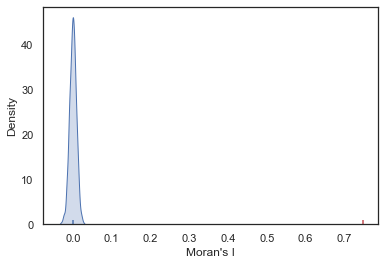

In [106]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [107]:
# check p-value
mi.p_sim

0.001

The p-value indicates that the spatial autocorrelation of % minority population is statistically significant; we can reject the null hypothesis that minority populations are not clustered in certain areas.

#### 2. I'd like to next look at the spatial autocorrelation of the EJ index for cancer risk ('D_CANCR_2').

In [109]:
# fill the NA values (if any) with mean value of the column
EJscreen_gdf['D_CANCR_2'].fillna((EJscreen_gdf['D_CANCR_2'].mean()), inplace=True)

In [116]:
wq.transform = 'r'
y1 = df['D_CANCR_2']

In [115]:
np.random.seed(12345)

# calculate the moran's I coefficient
mi2 = esda.moran.Moran(y, wq)
mi.I

0.6754208801260132

This positive Moran's I coefficient indicates that block groups with similar rates of cancer risk are closer to one another. However, clustering is not as prevalent as minority population percentage.

Text(0.5, 0, "Moran's I")

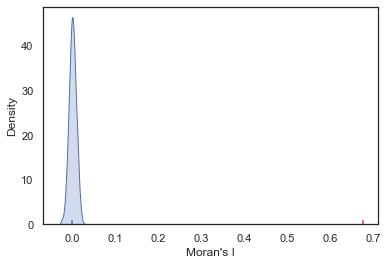

In [117]:
sbn.kdeplot(mi2.sim, shade=True)
plt.vlines(mi2.I, 0, 1, color='r')
plt.vlines(mi2.EI, 0,1)
plt.xlabel("Moran's I")

In [118]:
# check p-value
mi2.p_sim

0.001

The p-value indicates that the spatial autocorrelation of the cancer risk index is statistically significant; we can reject the null hypothesis that census tracts with similar cancer risks are not clustered.

## Next Steps

### 1. Visualize the choropleth maps on a web map with the ability to toggle between different layers and click on pop-ups with extensive attribute information!

## Conclusion

### Proximity to National Priority List sites and minority population percentage did not have the statistically significant relationship that I was expecting. National Priority List (NPL) sites are Superfund sites that are deemed eligible for long-term environmental remediation efforts, so this may instead indicate that the most contaminated/hazardous Superfund sites are not clustered within indigenous communities' lands in Arizona.

### I did find in this analysis that the correlation between the cancer risk indicator + the respitatory hazard index and the percentage of minority populations was statistically significant, which could lead to further analyses of these trends.

### This environmental justice dataset has potential for providing key information regarding public health issues nationwide. The website allows users to download summarized reports for their areas of interest if they do not have experience with downloading the GIS data, but using Markdown with tools such as Jupyter Notebook or R could provide helpful tutorials for inexperienced users looking to study the relationships between individual variables in their study areas.